In [53]:
pip install mathplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib


In [4]:
"""to zoom in a particular point on an image (mouse event binding)"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))
image_path = r"C:\Users\BhavyeBhasin\Downloads\SS_007.png"
img = mpimg.imread(image_path)
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

241.926697771818 129.40010837818468
324.58435129227206 200.40802549642714


In [3]:
"""to get coordinates of points clicked by user on image"""
%matplotlib tk 

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(f"Clicked at (x, y): ({ix:.2f}, {iy:.2f})")

fig = plt.figure(figsize=(10, 8))
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.imshow(img)
plt.show()

Clicked at (x, y): (275.28, 17.14)
Clicked at (x, y): (571.98, 25.69)
Clicked at (x, y): (255.31, 346.17)
Clicked at (x, y): (553.91, 347.12)


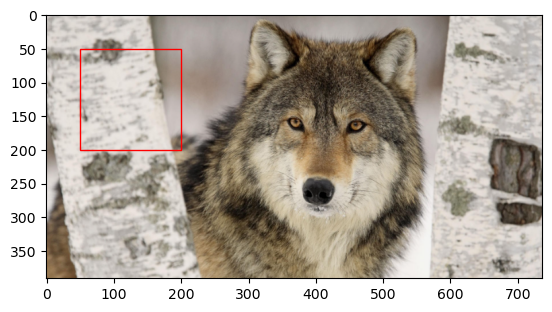

Box coordinates: [(50, 50), (200, 200)]


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Define the box coordinates (top-left and bottom-right)
box_coordinates = [(50, 50), (200, 200)]
# Create a Rectangle patch
rect = patches.Rectangle(box_coordinates[0], 
                         box_coordinates[1][0]-box_coordinates[0][0], 
                         box_coordinates[1][1]-box_coordinates[0][1], 
                         linewidth=1, edgecolor='r', facecolor='none')
# Create figure and axes
fig, ax = plt.subplots(1)
# Display the image
ax.imshow(img_rgb)
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()
print(f'Box coordinates: {box_coordinates}')

In [68]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
fig, ax = plt.subplots(1)
ax.imshow(img_rgb)
for (x, y, w, h) in faces:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

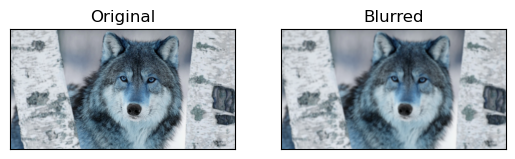

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
blur = cv.blur(img, (5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()




In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import convolve

image_path = r"C:\Users\BhavyeBhasin\Downloads\wolfss.png"
img = mpimg.imread(image_path)

# Define the kernel size for the mean filter
kernel_size = 5

# Create a kernel of ones of size kernel_size x kernel_size
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# Apply the mean filter using the convolve function
filtered_img = convolve(img, kernel)

# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(filtered_img)
axs[1].set_title('Filtered Image')
plt.show()


RuntimeError: filter weights array has incorrect shape.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Load the image
image = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def f(H, S, V):
    # Define range of color in HSV
    lower_color = np.array([H, S, V])
    upper_color = np.array([180, 255, 255])

    # Threshold the HSV image to get only the colors in range
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(image, image, mask=mask)

    # Display the resulting frame
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()

interact(f, H=widgets.IntSlider(min=0, max=179, step=1, value=0), 
            S=widgets.IntSlider(min=0, max=255, step=1, value=0), 
            V=widgets.IntSlider(min=0, max=255, step=1, value=0));


interactive(children=(IntSlider(value=0, description='H', max=179), IntSlider(value=0, description='S', max=25…

In [4]:
!pip install --upgrade ipywidgets



In [5]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
theme troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [6]:
!pip install jupyter


In [8]:
!pip install jupyter_contrib_nbextensions


  Using cached jupyter_contrib_nbextensions-0.7.0.tar.gz (23.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jupyter_contrib_core-0.4.2-py2.py3-none-any.whl
  Using cached jupyter_highlight_selected_word-0.2.0-py2.py3-none-any.whl.metadata (730 bytes)
  Using cached jupyter_nbextensions_configurator-0.6.3-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached jupyter_highlight_selected_word-0.2.0-py2.py3-none-any.whl (11 kB)
Using cached jupyter_nbextensions_configurator-0.6.3-py2.py3-none-any.whl (466 kB)
  Running setup.py clean for jupyter_contrib_nbextensions
Failed to build jupyter_contrib_nbextensions


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [3049 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\jupyter_contrib_nbextensions
  copying src\jupyter_contrib_nbextensions\application.py -> build\lib\jupyter_contrib_nbextensions
  copying src\jupyter_contrib_nbextensions\install.py -> build\lib\jupyter_contrib_nbextensions
  copying src\jupyter_contrib_nbextensions\migrate.py -> build\lib\jupyter_contrib_nbextensions
  copying src\jupyter_contrib_nbextensions\__init__.py -> build\lib\jupyter_contrib_nbextensions
  creating build\lib\jupyter_contrib_nbextensions\config_scripts
  copying src\jupyter_contrib_nbextensions\config_scripts\highlight_html_cfg.py -> build\lib\jupyter_contrib_nbextensions\config_scripts
  copying src\jupyter_contrib_nbextensions\config_scripts\highlight_latex_cfg.py -> build\lib\jupyter_contrib_nbextensions\c

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Load the image
image = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

def f(H, S, V):
    # Define range of color in HSV
    lower_color = np.array([H, S, V])
    upper_color = np.array([180, 255, 255])

    # Threshold the HSV image to get only the colors in range
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(image, image, mask=mask)

    # Display the resulting frame
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.show()

interact(f, H=widgets.IntSlider(min=0, max=179, step=1, value=0), 
            S=widgets.IntSlider(min=0, max=255, step=1, value=0), 
            V=widgets.IntSlider(min=0, max=255, step=1, value=0));


interactive(children=(IntSlider(value=0, description='H', max=179), IntSlider(value=0, description='S', max=25…

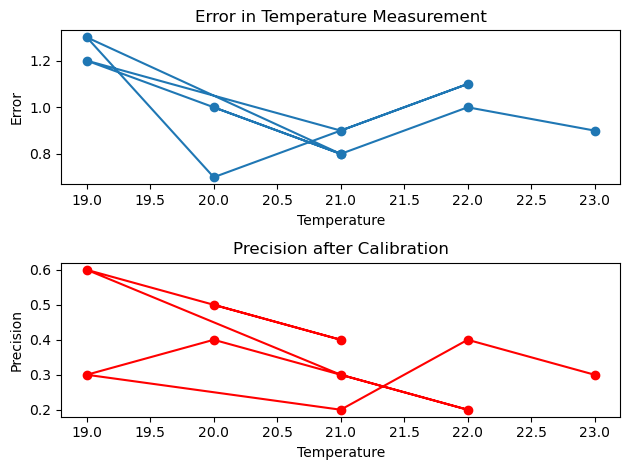

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data for temperature measurements and their errors
temperature = np.array([20, 21, 19, 21, 22, 20, 19, 21, 22, 23])
errors = np.array([1, 0.8, 1.2, 0.9, 1.1, 0.7, 1.3, 0.8, 1, 0.9])

# And data for precision after calibration
precision_after_calibration = np.array([0.5, 0.4, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.3])

# Create a figure and a set of subplots
fig, axs = plt.subplots(2)

# Plotting the error in temperature measurement
axs[0].plot(temperature, errors, marker='o')
axs[0].set_title('Error in Temperature Measurement')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Error')

# Plotting the precision after calibration
axs[1].plot(temperature, precision_after_calibration, marker='o', color='r')
axs[1].set_title('Precision after Calibration')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Precision')

# Display the figure with the subplots
plt.tight_layout()
plt.show()


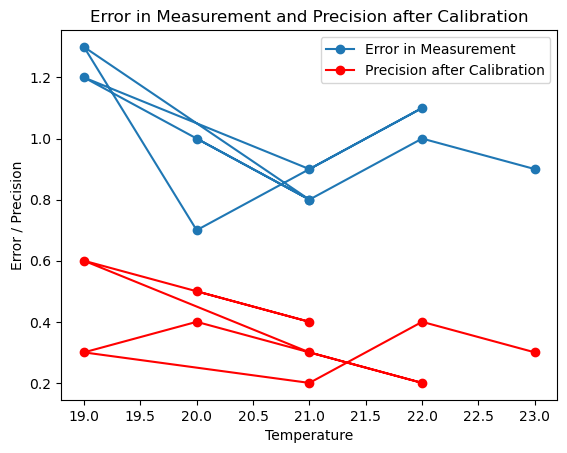

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data for temperature measurements and their errors
temperature = np.array([20, 21, 19, 21, 22, 20, 19, 21, 22, 23])
errors = np.array([1, 0.8, 1.2, 0.9, 1.1, 0.7, 1.3, 0.8, 1, 0.9])

# And data for precision after calibration
precision_after_calibration = np.array([0.5, 0.4, 0.6, 0.3, 0.2, 0.4, 0.3, 0.2, 0.4, 0.3])

# Create a figure
plt.figure()

# Plotting the error in temperature measurement
plt.plot(temperature, errors, marker='o', label='Error in Measurement')

# Plotting the precision after calibration
plt.plot(temperature, precision_after_calibration, marker='o', color='r', label='Precision after Calibration')

# Adding title and labels
plt.title('Error in Measurement and Precision after Calibration')
plt.xlabel('Temperature')
plt.ylabel('Error / Precision')

# Adding a legend
plt.legend()

# Display the figure
plt.show()


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier("Data\\cascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("Data\\cascades\\haarcascade_eye.xml")

# Load the input image
image = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 4, 4)

for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face
    cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 205), 3)
    
    # Detect eyes within the face region
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 1)
    
    for (ex, ey, ew, eh) in eyes:
        # Draw rectangles around the detected eyes
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

# Resize the image for display
image = cv2.resize(image, (800, 700))

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Face and Eye Detection")
plt.axis("off")
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
